In [99]:
import os
import pandas as pd
import numpy as np
import kagglehub
import matplotlib.pyplot as plt
import seaborn as sns
import pymc_marketing
from scipy.stats import pearsonr
from scipy import stats

##Because this is fictional data, and I found that some of the data is too random and lacks patterns during the analysis process, it is only used for practice.

In [100]:

df = pd.read_csv("D:/MMM analysis/kagglehub/datasets/manishabhatt22/marketing-campaign-performance-dataset/versions/1/marketing_campaign_dataset.csv")
df

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
0,1,Innovate Industries,Email,Men 18-24,30 days,Google Ads,0.04,"$16,174.00",6.29,Chicago,Spanish,506,1922,6,Health & Wellness,1/1/2021
1,2,NexGen Systems,Email,Women 35-44,60 days,Google Ads,0.12,"$11,566.00",5.61,New York,German,116,7523,7,Fashionistas,2/1/2021
2,3,Alpha Innovations,Influencer,Men 25-34,30 days,YouTube,0.07,"$10,200.00",7.18,Los Angeles,French,584,7698,1,Outdoor Adventurers,3/1/2021
3,4,DataTech Solutions,Display,All Ages,60 days,YouTube,0.11,"$12,724.00",5.55,Miami,Mandarin,217,1820,7,Health & Wellness,4/1/2021
4,5,NexGen Systems,Email,Men 25-34,15 days,YouTube,0.05,"$16,452.00",6.50,Los Angeles,Mandarin,379,4201,3,Health & Wellness,5/1/2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,199996,TechCorp,Display,All Ages,30 days,Google Ads,0.06,"$18,365.00",2.84,Chicago,German,858,5988,1,Tech Enthusiasts,7/12/2021
199996,199997,DataTech Solutions,Email,Men 25-34,15 days,Facebook,0.02,"$8,168.00",4.14,Chicago,Spanish,228,3068,7,Foodies,8/12/2021
199997,199998,DataTech Solutions,Social Media,Men 18-24,45 days,Website,0.05,"$13,397.00",3.25,New York,Mandarin,723,9548,3,Tech Enthusiasts,9/12/2021
199998,199999,Innovate Industries,Influencer,All Ages,30 days,YouTube,0.10,"$18,508.00",3.86,Houston,French,528,2763,1,Foodies,10/12/2021


In [101]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

Campaign_ID         0
Company             0
Campaign_Type       0
Target_Audience     0
Duration            0
Channel_Used        0
Conversion_Rate     0
Acquisition_Cost    0
ROI                 0
Location            0
Language            0
Clicks              0
Impressions         0
Engagement_Score    0
Customer_Segment    0
Date                0
dtype: int64

In [102]:
# Remove dollar signs and commas, and convert to numeric
df['Acquisition_Cost'] = df['Acquisition_Cost'].replace('[\$,]', '', regex=True).astype(float)

In [103]:
# Convert Date column to ISO 8601 datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

In [104]:
# Convert text to lowercase for uniformity
df['Company'] = df['Company'].str.lower()
df['Location'] = df['Location'].str.lower()
df['Language'] = df['Language'].str.lower()


In [105]:
# Remove duplicates 
df = df.drop_duplicates()

In [106]:
# Convert to a categorical data type
categorical_cols = ['Campaign_ID','Company','Duration','Location','Language','Campaign_Type', 'Target_Audience', 'Channel_Used', 'Customer_Segment']
for col in categorical_cols:
    df[col] = df[col].astype('category')

# Display data types of each column
print("Data types of each column:\n", df.dtypes)

Data types of each column:
 Campaign_ID               category
Company                   category
Campaign_Type             category
Target_Audience           category
Duration                  category
Channel_Used              category
Conversion_Rate            float64
Acquisition_Cost           float64
ROI                        float64
Location                  category
Language                  category
Clicks                       int64
Impressions                  int64
Engagement_Score             int64
Customer_Segment          category
Date                datetime64[ns]
dtype: object


In [107]:
df.describe()

,Conversion_Rate,Acquisition_Cost,ROI,Clicks,Impressions,Engagement_Score
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.080064,12504.393040,5.002438,549.772030,5507.301520,5.494710
std,0.040601,4337.664545,1.734488,260.019056,2596.864286,2.872581
min,0.010000,5000.000000,2.000000,100.000000,1000.000000,1.000000
25%,0.050000,8739.750000,3.500000,325.000000,3266.000000,3.000000
50%,0.080000,12496.500000,5.010000,550.000000,5517.500000,5.000000
75%,0.120000,16264.000000,6.510000,775.000000,7753.000000,8.000000
max,0.150000,20000.000000,8.000000,1000.000000,10000.000000,10.000000


# Visualization

C:\Users\LYX\AppData\Local\Temp\ipykernel_16920\3205649209.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Campaign_Type', y='Conversion_Rate', data=df,


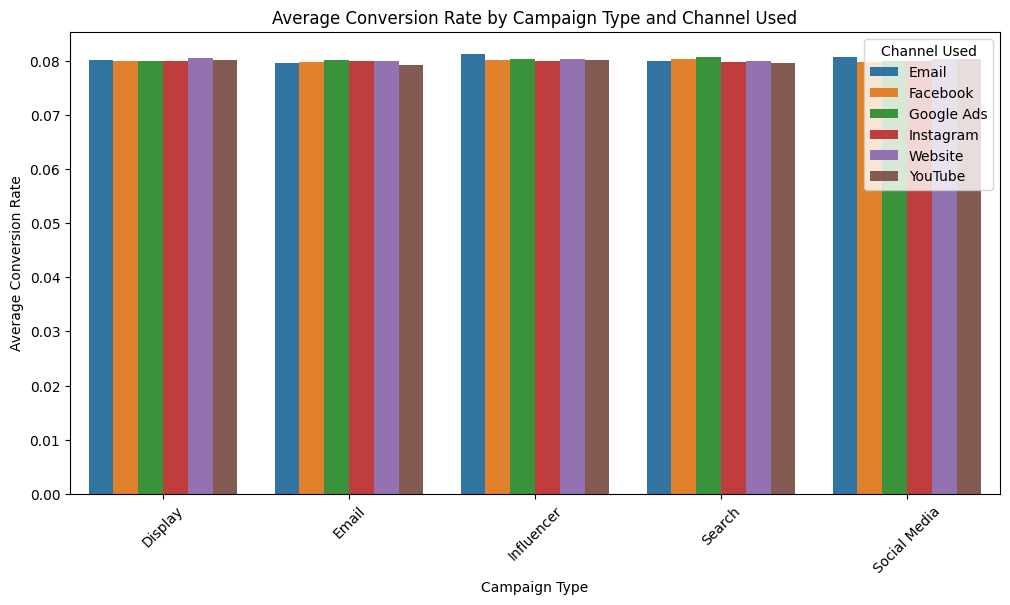

In [108]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Campaign_Type', y='Conversion_Rate', data=df, 
            estimator=np.mean, ci=None, hue='Channel_Used')
plt.title('Average Conversion Rate by Campaign Type and Channel Used')
plt.xticks(rotation=45)
plt.ylabel('Average Conversion Rate')
plt.xlabel('Campaign Type')
plt.legend(title='Channel Used')
plt.show()

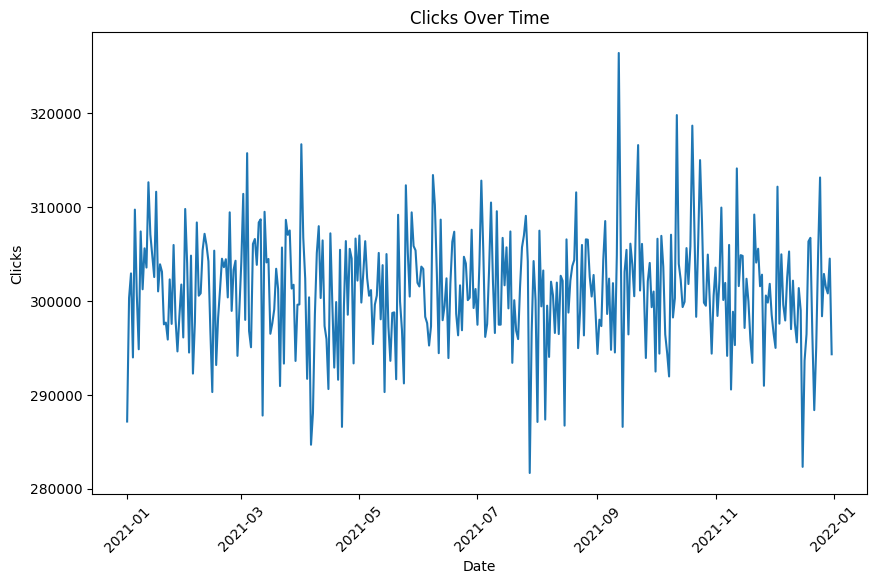

In [89]:
clicks_over_time = df.groupby('Date')['Clicks'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Clicks', data=clicks_over_time)
plt.title('Clicks Over Time')
plt.xticks(rotation=45)
plt.show()

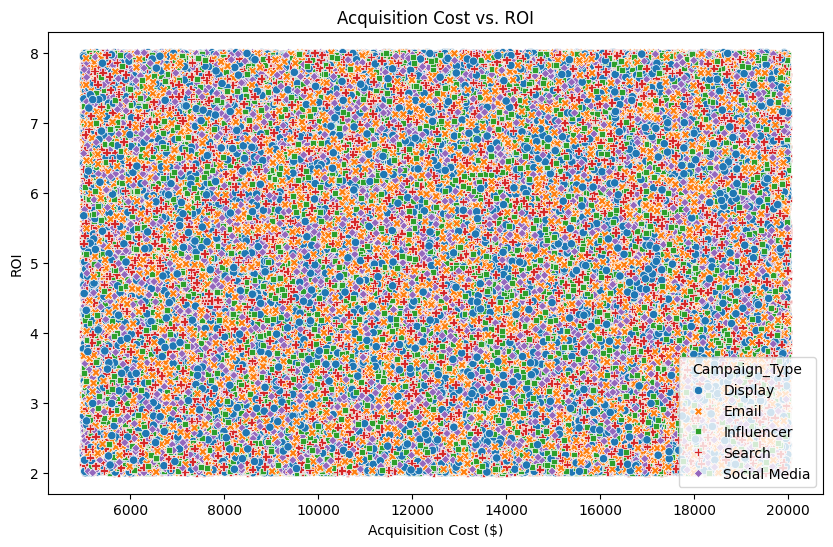

In [90]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Acquisition_Cost', y='ROI', data=df, hue='Campaign_Type', style='Campaign_Type')
plt.title('Acquisition Cost vs. ROI')
plt.xlabel('Acquisition Cost ($)')
plt.ylabel('ROI')
plt.show()

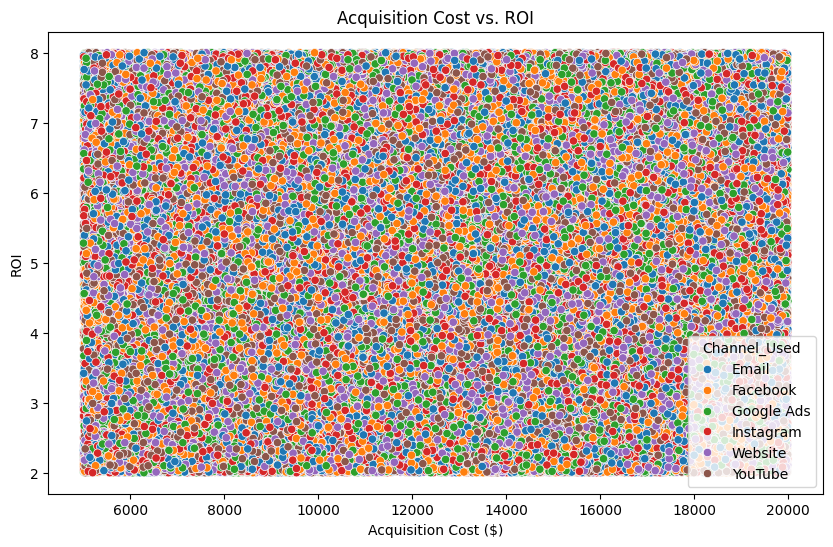

In [72]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Acquisition_Cost', y='ROI', data=df, hue='Channel_Used')
plt.title('Acquisition Cost vs. ROI')
plt.xlabel('Acquisition Cost ($)')
plt.ylabel('ROI')
plt.show()

# Correlation testing

In [75]:
# Group by Channel_Used and calculate Pearson correlation for each group
results = {}

for channel, group in df.groupby('Channel_Used'):
    correlation, p_value = pearsonr(group['Acquisition_Cost'], group['ROI'])
    results[channel] = {
        'Correlation Coefficient': correlation,
        'p-value': p_value
    }

# Display results
for channel, stats in results.items():
    print(f"Channel: {channel}, Correlation Coefficient: {stats['Correlation Coefficient']:.4f}, p-value: {stats['p-value']:.4f}")

Channel: Email, Correlation Coefficient: 0.0035, p-value: 0.5259
Channel: Facebook, Correlation Coefficient: 0.0133, p-value: 0.0156
Channel: Google Ads, Correlation Coefficient: 0.0077, p-value: 0.1592
Channel: Instagram, Correlation Coefficient: -0.0037, p-value: 0.4982
Channel: Website, Correlation Coefficient: -0.0052, p-value: 0.3377
Channel: YouTube, Correlation Coefficient: 0.0121, p-value: 0.0269


# Hypothesis: Customer Segment Influences ROI

In [77]:

# Group data by Customer Segment
grouped_data = df.groupby('Customer_Segment')['ROI'].apply(list)

# Perform ANOVA
f_statistic, p_value = stats.f_oneway(*grouped_data)

# Display results
print(f"ANOVA F-statistic: {f_statistic:.4f}, p-value: {p_value:.4f}")

ANOVA F-statistic: 0.0633, p-value: 0.9926


#### there is no significant influence of customer segment on ROI.